In [1]:
from tensorflow.keras.applications import VGG16
import tensorflow as tf
with tf.device("/cpu:0"):
    conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
    conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

original_dataset_dir = "C:/Users/galin/Downloads/Python/kagglecatsanddogs_3367a/PetImages"
base_dir = "C:/Users/galin/Downloads/Python/cats_and_dogs_small"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

with tf.device("/cpu:0"):

    datagen = ImageDataGenerator(rescale=1./255)
    batch_size=20

    def extract_features(directory, sample_count):
        features = np.zeros(shape=(sample_count, 4, 4, 512))
        labels = np.zeros(shape=(sample_count))
        generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode="binary")
        i = 0
        for input_batch, labels_batch in generator:
            features_batch = conv_base.predict(input_batch)
            features[i * batch_size : (i + 1) * batch_size] = features_batch
            labels[i * batch_size : (i + 1) * batch_size] = labels_batch
            i += 1
            if i * batch_size >= sample_count:
                break
        return features, labels

    train_features, train_labels = extract_features(train_dir, 2000)
    validation_features, validation_labels = extract_features(validation_dir, 1000)
    test_features, test_labels = extract_features(test_dir, 1000)

    train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
    validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
    test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Dense(256, activation="relu", input_dim=4*4*512))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(optimizer=RMSprop(lr=2e-5), loss="binary_crossentropy", metrics=["acc"])
    
    history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 5s 44ms/step - loss: 0.6765 - acc: 0.5932 - val_loss: 0.4410 - val_acc: 0.8490
Epoch 2/30
100/100 [==============================] - 3s 31ms/step - loss: 0.4458 - acc: 0.7978 - val_loss: 0.3649 - val_acc: 0.8490
Epoch 3/30
100/100 [==============================] - 3s 32ms/step - loss: 0.3642 - acc: 0.8426 - val_loss: 0.3249 - val_acc: 0.8720
Epoch 4/30
100/100 [==============================] - 3s 33ms/step - loss: 0.3271 - acc: 0.8575 - val_loss: 0.3067 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 3s 34ms/step - loss: 0.2992 - acc: 0.8744 - val_loss: 0.2806 - val_acc: 0.8920
Epoch 6/30
100/100 [==============================] - 4s 36ms/step - loss: 0.2563 - acc: 0.8979 - val_loss: 0.2697 - val_acc: 0.9000
Epoch 7/30
100/100 [==============================] - 3s 35ms/step - loss: 0.2593 - acc: 0.8990 - val_loss: 0.2611 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 3s 33ms/step - 

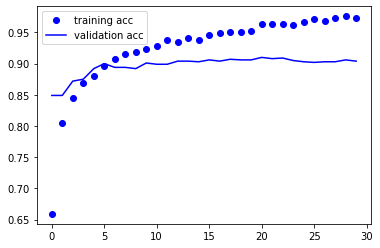

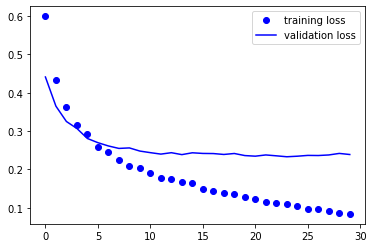

In [4]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="training acc")
plt.plot(epochs, val_acc, "b", label="validation acc")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="training loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.legend()

plt.show()

In [1]:
from tensorflow.keras.applications import VGG16
import tensorflow as tf
with tf.device("/cpu:0"):
    conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
    conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

with tf.device("/cpu:0"):
    model = Sequential()
    model.add(conv_base)
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
print(len(model.trainable_weights))
conv_base.trainable = False
print(len(model.trainable_weights))

30
4


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
with tf.device("/cpu:0"):
    train_datagen = ImageDataGenerator(
        rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest"
    )
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir, target_size=(150, 150), batch_size=20, class_mode="binary"
    )
    validation_generator = test_datagen.flow_from_directory(
        validation_dir, target_size=(150, 150), batch_size=20, class_mode="binary"
    )
    
    model.compile(loss="binary_crossentropy", optimizer=RMSprop, metrics=["acc"])
    history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50, verbose=2)


In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable == True:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
file size over